In [14]:
import pandas as pd
from gensim.parsing.preprocessing import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [15]:
df_corpus = pd.read_csv('corpus.csv',index_col=0)

In [34]:
corpus = []
for topic in df_corpus:
    corpus += df_corpus[topic].tolist()


corpus = pd.Series(corpus)
corpus = corpus.apply(lambda x: x.lower())
corpus = corpus.apply(strip_tags)
corpus = corpus.apply(strip_punctuation2)
corpus = corpus.apply(strip_numeric)
corpus = corpus.apply(lambda x: re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', u' ', x))
corpus = corpus.apply(lambda x: re.sub('«|»', ' ', x))
corpus = corpus.apply(strip_multiple_whitespaces)
corpus

0       компания яндекс приобрела сервис вопросов и о...
1       интеллектуальную транспортную систему итс инн...
2       концепцию платформы проекта автодата по сбору...
3       производитель развивающих образовательных наб...
4       федеральная служба по надзору в сфере связи и...
5       федеральная антимонопольная служба фас россии...
6       в сувенирных магазинах московского метро стар...
7       операционная выручка оператора мобильной связ...
8       инновационный кластер москвы может стать площ...
9       ввод в эксплуатацию it платформы инновационно...
10      федеральная служба по надзору в сфере защиты ...
11      компания nextouch являющаяся резидентом особо...
12      вторая в этом году акция день без турникетов ...
13      уникальное приложение для онлайн трансляций л...
14      количество базовых станций операторов большой...
15      федеральная антимонопольная служба фас россии...
16      москва расширяет возможности для бесплатного ...
17      жители москвы в течение

In [35]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [36]:
import stop_words
from nltk.stem.snowball import RussianStemmer

corpus_tokens = []
inds_to_drop = []

for i, sentence in enumerate(corpus[:]):
    tmp_tokens = []
    sp = sentence.split()
    for word in sp:
        if word not in stop_words.get_stop_words('ru'):
            if morph.word_is_known(word):
                tmp_tokens.append(word)
    if len(tmp_tokens) > 0:
        corpus_tokens.append(tmp_tokens)
    else:
        inds_to_drop.append(i)
#     break
        
print(len(corpus_tokens))#, len(texts))

800


In [37]:
answ_corpus = answ_corpus[~answ_corpus.index.isin(inds_to_drop)]
answ_corpus.index = pd.RangeIndex(len(answ_corpus))

In [38]:
stemmer = RussianStemmer()

In [41]:
corpus_tokens_stem = []

for i, tokens in enumerate((corpus_tokens[:])):
    tmp = [stemmer.stem(word) for word in tokens]
    corpus_tokens_stem.append(tmp)
#     break
    
corpus_tokens_stem

[['компан',
  'яндекс',
  'приобрел',
  'сервис',
  'вопрос',
  'ответ',
  'планиру',
  'объедин',
  'яндекс',
  'знаток',
  'агентств',
  'городск',
  'новост',
  'москв',
  'сообщ',
  'пресс',
  'служб',
  'яндекс',
  'яндекс',
  'куп',
  'сервис',
  'вопрос',
  'ответ',
  'объедин',
  'яндекс',
  'знаток',
  'руководств',
  'основательниц',
  'тон',
  'самсонов',
  'дополн',
  'результат',
  'поиск',
  'яндекс',
  'частност',
  'ближайш',
  'поисков',
  'выдач',
  'яндекс',
  'появ',
  'быстр',
  'ответ',
  'говор',
  'сообщен',
  'пресс',
  'служб',
  'поясн',
  'осен',
  'яндекс',
  'нача',
  'показыва',
  'поиск',
  'быстр',
  'ответ',
  'знаток',
  'помога',
  'люд',
  'узна',
  'пример',
  'планет',
  'вселен',
  'обеспеч',
  'анонимн',
  'интернет',
  'разобра',
  'вопрос',
  'однозначн',
  'ответ',
  'момент',
  'запуск',
  'пользовател',
  'стал',
  'видет',
  'быстр',
  'ответ',
  'знаток',
  'появля',
  'результат',
  'поиск',
  'млн',
  'планир',
  'благодар',
  'количест

In [44]:
clear_corpus = []
for token_list in corpus_tokens_stem:
    if len(' '.join(token_list))<2:
        print(token_list)
    clear_corpus.append(' '.join(token_list))
    
clear_corpus[0]

'компан яндекс приобрел сервис вопрос ответ планиру объедин яндекс знаток агентств городск новост москв сообщ пресс служб яндекс яндекс куп сервис вопрос ответ объедин яндекс знаток руководств основательниц тон самсонов дополн результат поиск яндекс частност ближайш поисков выдач яндекс появ быстр ответ говор сообщен пресс служб поясн осен яндекс нача показыва поиск быстр ответ знаток помога люд узна пример планет вселен обеспеч анонимн интернет разобра вопрос однозначн ответ момент запуск пользовател стал видет быстр ответ знаток появля результат поиск млн планир благодар количеств быстр ответ значительн вырастет работ сервис написа тыс ответ вопрос пользовател яндекс видет результат поиск качествен ответ смогут быстр узнава начина дела надежд росс стремя саморазвит сможет получ доступ ответ эксперт познаком людьм вдохнов помогут измен лучш сообществ эксперт наш сервис профессионал готов помоч ищет ответ всевозможн вопрос миллион пользовател яндекс смогут обрат наш эксперт начнут отве

In [45]:
vectorizer = TfidfVectorizer()
vectorizer.fit(clear_corpus)
X = vectorizer.transform(clear_corpus)

In [51]:
def str_prepr(stringa):
    res_str = stringa.lower()
    res_str = strip_tags(res_str)
    res_str = strip_punctuation2(res_str)
    res_str = strip_numeric(res_str)
    res_str = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', u' ', res_str)
    res_str = re.sub('«|»', ' ', res_str)
    res_str =strip_multiple_whitespaces(res_str)
    sp = res_str.split()
    tmp_tokens = []
    for word in sp:
        if word not in stop_words.get_stop_words('ru'):
            if morph.word_is_known(word):
                tmp_tokens.append(stemmer.stem(word))
    res_str = ' '.join(tmp_tokens)
    res_embedding = vectorizer.transform([res_str])
    return res_embedding


In [50]:
corpus

0       компания яндекс приобрела сервис вопросов и о...
1       интеллектуальную транспортную систему итс инн...
2       концепцию платформы проекта автодата по сбору...
3       производитель развивающих образовательных наб...
4       федеральная служба по надзору в сфере связи и...
5       федеральная антимонопольная служба фас россии...
6       в сувенирных магазинах московского метро стар...
7       операционная выручка оператора мобильной связ...
8       инновационный кластер москвы может стать площ...
9       ввод в эксплуатацию it платформы инновационно...
10      федеральная служба по надзору в сфере защиты ...
11      компания nextouch являющаяся резидентом особо...
12      вторая в этом году акция день без турникетов ...
13      уникальное приложение для онлайн трансляций л...
14      количество базовых станций операторов большой...
15      федеральная антимонопольная служба фас россии...
16      москва расширяет возможности для бесплатного ...
17      жители москвы в течение

In [52]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
nbrs = NearestNeighbors(metric='cosine',radius=1.0,n_neighbors=10).fit(X)
test_str = 'приобрела сервис вопросов и ответов TheQuestion, планируя объединить его с'
distances, indices = nbrs.kneighbors(str_prepr(test_str))

In [53]:
indices

array([[  0, 445,  65, 118, 166, 139, 595, 162, 160, 237]], dtype=int64)

In [54]:
distances

array([[0.64057143, 0.84286041, 0.86565761, 0.89040618, 0.89694114,
        0.90832068, 0.90892935, 0.91050447, 0.91664423, 0.92503498]])

In [55]:
clear_corpus[89]

'заместител председател комитет госдум образован наук борис черныш лдпр предлож обуча школьник основ программирован основ технолог виртуальн реальност депутат сообщ агентств городск новост москв уход формализм основ программирован придума совместн ученик пят класс вообщ уч основ программирован основ технолог дополнен реальност говор принос доход супер актуальн постоя слух боя сто интересн тем принос дополнительн возможн будущ слушател курс ученик изуча предмет заяв б черныш слов депутат изучен программирован школ сдела обязательн предмет предмет сто сдела обязательн некотор дан настольк важн жив эпох пер эпох предмет основ программирован хорош подготовк ученик предмет уничтож егэ отмет б черныш ран извест сообща планир ввест рф изучен осн программирован урок математик благодар школьник смогут соответствова требован современ технологическ прогресс'

In [60]:
nbrs = NearestNeighbors(metric='l2',radius=1.0,n_neighbors=10).fit(X)
test_str = 'Почти 80 автоматов по продаже билетов установлено на станциях Ленинградского направления Октябрьской железной дороги'
distances, indices = nbrs.kneighbors(str_prepr(test_str))

In [61]:
indices

array([[ 34,  38, 148, 799, 304,  14,  81, 543, 473, 430]], dtype=int64)

In [62]:
distances

array([[0.96548578, 1.27616912, 1.30570098, 1.31188765, 1.31834606,
        1.33067468, 1.33164815, 1.33477479, 1.3352963 , 1.34100083]])

In [63]:
clear_corpus[0]

'компан яндекс приобрел сервис вопрос ответ планиру объедин яндекс знаток агентств городск новост москв сообщ пресс служб яндекс яндекс куп сервис вопрос ответ объедин яндекс знаток руководств основательниц тон самсонов дополн результат поиск яндекс частност ближайш поисков выдач яндекс появ быстр ответ говор сообщен пресс служб поясн осен яндекс нача показыва поиск быстр ответ знаток помога люд узна пример планет вселен обеспеч анонимн интернет разобра вопрос однозначн ответ момент запуск пользовател стал видет быстр ответ знаток появля результат поиск млн планир благодар количеств быстр ответ значительн вырастет работ сервис написа тыс ответ вопрос пользовател яндекс видет результат поиск качествен ответ смогут быстр узнава начина дела надежд росс стремя саморазвит сможет получ доступ ответ эксперт познаком людьм вдохнов помогут измен лучш сообществ эксперт наш сервис профессионал готов помоч ищет ответ всевозможн вопрос миллион пользовател яндекс смогут обрат наш эксперт начнут отве

In [64]:
clear_corpus[89]

'заместител председател комитет госдум образован наук борис черныш лдпр предлож обуча школьник основ программирован основ технолог виртуальн реальност депутат сообщ агентств городск новост москв уход формализм основ программирован придума совместн ученик пят класс вообщ уч основ программирован основ технолог дополнен реальност говор принос доход супер актуальн постоя слух боя сто интересн тем принос дополнительн возможн будущ слушател курс ученик изуча предмет заяв б черныш слов депутат изучен программирован школ сдела обязательн предмет предмет сто сдела обязательн некотор дан настольк важн жив эпох пер эпох предмет основ программирован хорош подготовк ученик предмет уничтож егэ отмет б черныш ран извест сообща планир ввест рф изучен осн программирован урок математик благодар школьник смогут соответствова требован современ технологическ прогресс'

In [65]:
nbrs = NearestNeighbors(metric='l2',radius=10.0,n_neighbors=10).fit(X)
test_str = 'Почти 80 автоматов по продаже билетов установлено на станциях Ленинградского направления Октябрьской железной дороги'
distances, indices = nbrs.kneighbors(str_prepr(test_str))

In [66]:
indices

array([[ 34,  38, 148, 799, 304,  14,  81, 543, 473, 430]], dtype=int64)

In [67]:
distances

array([[0.96548578, 1.27616912, 1.30570098, 1.31188765, 1.31834606,
        1.33067468, 1.33164815, 1.33477479, 1.3352963 , 1.34100083]])

In [68]:
def search_sys(string):
    preprocessed = str_prepr(string)
    distances, indices = nbrs.kneighbors(str_prepr(string))
    print('Ваш запрос: "' + string + '", найдено:')
    i = 1
    for text in answ_corpus[indices[0]]:
        print(str(i) + " текст")
        print(text)
        i+=1
        print('')

In [78]:
search_sys('блокировки')

Ваш запрос: "блокировки", найдено:
1 текст
[Снято ограничение доступа с 17 подсетей и 2,7 млн IP-адресов компании Amazon, сообщили в пресс-службе Федеральной службы по надзору в сфере связи, информационных технологий и массовых коммуникаций. «Роскомнадзор снял ограничение доступа с 17 подсетей и 2,7 млн IP-адресов, принадлежащих компании Amazon», - говорится в сообщении.Специалистами Роскомнадзора установлено, что данные подсети длительное время не используются для обеспечения функционирования мессенджера Telegram. Указанный мессенджер блокируется по решению Таганского районного суда Москвы от 13 апреля 2018 г. в связи с неисполнением российского законодательства.В январе 2019 г. пользователи в интернете стали сообщать о том, что у них стали чаще наблюдаться проблемы с доступом к мессенджеру Telegram. В то же самое время, интернет-активисты заявляли об активизации процессов по блокировке мессенджера со стороны Роскомнадзора, в том числе начались массовые блокировки прокси-адресов для T

In [79]:
search_sys('яндекс')

Ваш запрос: "яндекс", найдено:
1 текст
[Компания «Яндекс» приобрела сервис вопросов и ответов TheQuestion, планируя объединить его с «Яндекс.Знатоками». Об этом Агентству городских новостей «Москва» сообщили в пресс-службе «Яндекса».«Яндекс» купил сервис вопросов и ответов TheQuestion. Он объединится с «Яндекс.Знатоками» под руководством основательницы TheQuestion Тони Самсоновой и дополнит результаты поиска «Яндекса». В частности, в ближайшее время в поисковой выдаче «Яндекса» появятся быстрые ответы с TheQuestion», - говорится в сообщении.В пресс-службе пояснили, что осенью 2018 г. «Яндекс» начал показывать в поиске быстрые ответы Знатоков - они помогают людям узнать, к примеру, сколько планет во вселенной или как обеспечить анонимность в интернете, и разобраться в других вопросах без однозначного ответа. С момента запуска пользователи стали видеть быстрые ответы Знатоков в 10 раз чаще - сейчас они появляются в результатах поиска 1,8 млн раз в день. Планируется, что благодаря TheQues

In [82]:
search_sys('новости кино')

Ваш запрос: "новости кино", найдено:
1 текст
[Фонд кино подал иск в Арбитражный суд Москвы к кинокомпании Enjoy Movies на сумму почти в 113 млн руб. Соответствующие материалы имеются в распоряжении Агентства городских новостей «Москва». Согласно материалам иска, Фонд кино обратился в Арбитражный суд Москвы с иском к ООО «Энджой Мувиз» на сумму в 112,9 млн руб. В перечне кинокомпаний-должников Фонд кино указывал долг Enjoy Movies в размере 112,7 млн руб., выделенных ей фондом на фильм «Алладин» в 2016 г. Это самая большая сумма среди всех 24 компаний-должников перед Фондом кино по состоянию на 12 февраля 2019 г.Информацию, касающуюся производства или проката фильма «Алладин», на сайте кинокомпании и на сайте Фонда кино найти не удалось.В 2017 г. компания Enjoy Movies сообщила о намерении объявить себя банкротом, но затем вышла из банкротства. В июле 2018 г. пресс-служба Фонда кино сообщала, что Enjoy Movies полностью погасила все задолженности, вернув 50 млн руб., предоставленные на фил

In [88]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )
        

In [91]:
diffs = np.asarray([len(tokens) for tokens in corpus_tokens_stem])
print(len(diffs))

800


In [92]:
diffs

array([ 254,  168,  126,  123,  110,   90,  117,  137,  139,  135,  163,
        188,  252,  158,  121,   85,  123,  122,  135,  116,  157,  139,
        106,  115,   80,  191,   66,   58,  138,   65,  194,   73,  310,
        121,  111,   86, 1021,  123,   54,  128,   64,  148,  176,  168,
         88,  150,   83,   71,   58,   80,  129,   59,   61,  178,  145,
        141,  128,  140,  118,  327,  142,   52,  109,  112,  137,   73,
        165,  129,   91,  106,   90,  142,   82,  182,  117,  156,   67,
         84,   82,  267,  217,  150,   93,   94,  140,  131,  149,  154,
         91,  115,  127,  221,   83,  119,  215,   79,  130,  155,   73,
         84,  143,   57,  130,  152,  185,  161,   90,  160,   57,   85,
        128,   50,  125,   66,  105,  231,   39,   60,   67,  101,  144,
         73,  100,   94,   90,  155,   59,  263,  166,   46,   49,   60,
         46,   59,   71,  167,   96,   70,   60,   50,   61,   43,   75,
         66,   76,  100,   48,   98,   84,  201,  1

In [110]:
corp4learning = corpus_tokens_stem[diffs >= 8]


In [111]:
tmp_corp = []

for tokens in corp4learning:
    tmp_corp.append([t for t in tokens if len(t) > 2])
corp4learning = tmp_corp

In [112]:
vocab = np.unique(np.concatenate(corp4learning).flatten()).tolist()
print(len(vocab))

8684


In [113]:
real_vocab = dict.fromkeys(vocab,0)
for text in corp4learning:
    for word in text:
        real_vocab[word]+=1
top_used_vocab = pd.Series(real_vocab)
top_used_vocab.sort_values(ascending=False,inplace=True)
top_used_vocab.head()

москв    1084
тыс       807
служб     790
пресс     620
сообщ     588
dtype: int64

In [114]:
top100 = top_used_vocab.head(100).values

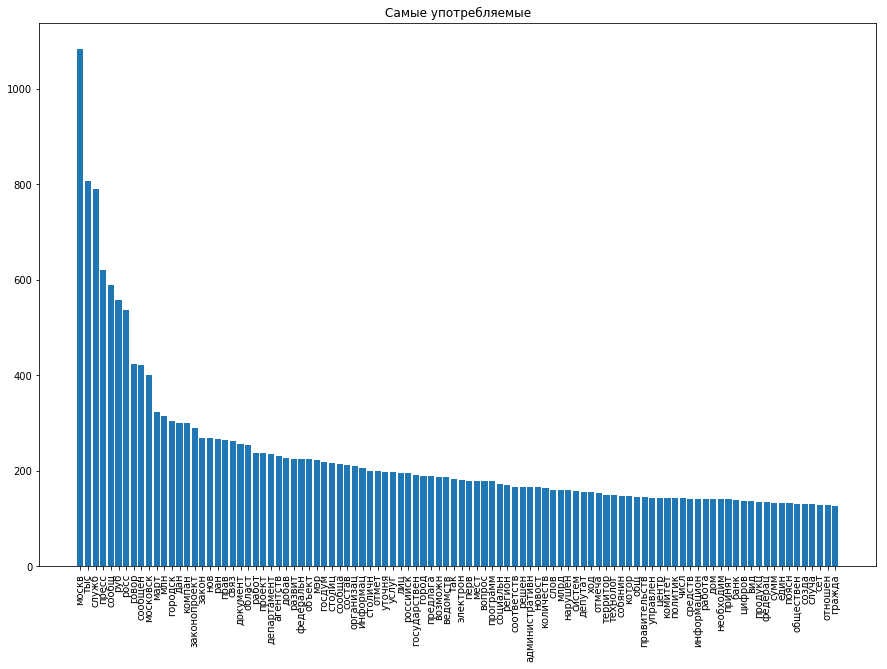

In [120]:
plt.figure(figsize=(15,10))
plt.bar(top_used_vocab.head(100).index,top_used_vocab.head(100).values)
plt.title('Самые употребляемые')
plt.xticks(rotation='vertical');

In [117]:
serialised_vocab = pd.Series(vocab)
corp_matrix = []
for text  in corp4learning:
    text_list = []
    for word in text:
        if word in serialised_vocab.values:
            text_list.append(serialised_vocab[serialised_vocab == word].index.values[0]) 
    corp_matrix.append(text_list)

In [121]:
corp_matrix

[[2836,
  8662,
  5884,
  6849,
  945,
  4609,
  5064,
  4334,
  8662,
  2256,
  61,
  1358,
  4154,
  3662,
  7147,
  5752,
  6995,
  8662,
  8662,
  3124,
  6849,
  945,
  4609,
  4334,
  8662,
  2256,
  6654,
  4558,
  7653,
  6718,
  1738,
  6504,
  5307,
  8662,
  8341,
  458,
  5308,
  1076,
  8662,
  5598,
  576,
  4609,
  1317,
  7150,
  5752,
  6995,
  5602,
  4536,
  8662,
  3910,
  5320,
  5307,
  576,
  4609,
  2256,
  5410,
  3319,
  7865,
  5861,
  5058,
  1012,
  4217,
  200,
  2462,
  6324,
  945,
  4391,
  4609,
  3627,
  2132,
  5394,
  7310,
  754,
  576,
  4609,
  2256,
  5600,
  6504,
  5307,
  3568,
  5060,
  446,
  2793,
  576,
  4609,
  2260,
  1149,
  6241,
  6849,
  3833,
  7774,
  4609,
  945,
  5394,
  8662,
  754,
  6504,
  5307,
  2692,
  4609,
  7021,
  576,
  7866,
  3915,
  1531,
  3758,
  6629,
  7406,
  6712,
  7023,
  5383,
  1786,
  4609,
  8540,
  5304,
  3322,
  640,
  5412,
  2347,
  3300,
  7151,
  8540,
  3924,
  6849,
  6150,
  1388,
  5414,
 

In [122]:
corp_matrix[0]

[2836,
 8662,
 5884,
 6849,
 945,
 4609,
 5064,
 4334,
 8662,
 2256,
 61,
 1358,
 4154,
 3662,
 7147,
 5752,
 6995,
 8662,
 8662,
 3124,
 6849,
 945,
 4609,
 4334,
 8662,
 2256,
 6654,
 4558,
 7653,
 6718,
 1738,
 6504,
 5307,
 8662,
 8341,
 458,
 5308,
 1076,
 8662,
 5598,
 576,
 4609,
 1317,
 7150,
 5752,
 6995,
 5602,
 4536,
 8662,
 3910,
 5320,
 5307,
 576,
 4609,
 2256,
 5410,
 3319,
 7865,
 5861,
 5058,
 1012,
 4217,
 200,
 2462,
 6324,
 945,
 4391,
 4609,
 3627,
 2132,
 5394,
 7310,
 754,
 576,
 4609,
 2256,
 5600,
 6504,
 5307,
 3568,
 5060,
 446,
 2793,
 576,
 4609,
 2260,
 1149,
 6241,
 6849,
 3833,
 7774,
 4609,
 945,
 5394,
 8662,
 754,
 6504,
 5307,
 2692,
 4609,
 7021,
 576,
 7866,
 3915,
 1531,
 3758,
 6629,
 7406,
 6712,
 7023,
 5383,
 1786,
 4609,
 8540,
 5304,
 3322,
 640,
 5412,
 2347,
 3300,
 7151,
 8540,
 3924,
 6849,
 6150,
 1388,
 5414,
 2570,
 4609,
 1010,
 945,
 3522,
 5394,
 8662,
 7021,
 4288,
 3924,
 8540,
 3923,
 4612,
 945,
 7580,
 6275,
 5802,
 7150,
 698

In [123]:
corp4learning[0]

['компан',
 'яндекс',
 'приобрел',
 'сервис',
 'вопрос',
 'ответ',
 'планиру',
 'объедин',
 'яндекс',
 'знаток',
 'агентств',
 'городск',
 'новост',
 'москв',
 'сообщ',
 'пресс',
 'служб',
 'яндекс',
 'яндекс',
 'куп',
 'сервис',
 'вопрос',
 'ответ',
 'объедин',
 'яндекс',
 'знаток',
 'руководств',
 'основательниц',
 'тон',
 'самсонов',
 'дополн',
 'результат',
 'поиск',
 'яндекс',
 'частност',
 'ближайш',
 'поисков',
 'выдач',
 'яндекс',
 'появ',
 'быстр',
 'ответ',
 'говор',
 'сообщен',
 'пресс',
 'служб',
 'поясн',
 'осен',
 'яндекс',
 'нача',
 'показыва',
 'поиск',
 'быстр',
 'ответ',
 'знаток',
 'помога',
 'люд',
 'узна',
 'пример',
 'планет',
 'вселен',
 'обеспеч',
 'анонимн',
 'интернет',
 'разобра',
 'вопрос',
 'однозначн',
 'ответ',
 'момент',
 'запуск',
 'пользовател',
 'стал',
 'видет',
 'быстр',
 'ответ',
 'знаток',
 'появля',
 'результат',
 'поиск',
 'млн',
 'планир',
 'благодар',
 'количеств',
 'быстр',
 'ответ',
 'значительн',
 'вырастет',
 'работ',
 'сервис',
 'написа',

In [124]:
def computeTF(text):
    text_dict = set()
    for word in text:
        if word in serialised_vocab.values:
            text_dict.add(word)
    text_len = len(text)
    print(text_dict)
    text_dict = dict.fromkeys(text_dict,0)
    for word in text:
        if word in text_dict.keys():
            text_dict[word] += 1
    tf_vec = []
    for word in text_dict.keys():
        tf_vec.append(text_dict[word]/text_len)
    return tf_vec

In [125]:
computeTF(corp4learning[0])

{'сможет', 'ищет', 'вырастет', 'городск', 'качествен', 'разнообразн', 'ним', 'значительн', 'последн', 'оценива', 'учен', 'агентств', 'помога', 'отвеча', 'рейтинг', 'обеспеч', 'выдач', 'приложен', 'оценок', 'возможн', 'привод', 'сообщ', 'планет', 'дополн', 'смогут', 'благодар', 'саморазвит', 'осен', 'информац', 'частност', 'присоедин', 'компан', 'вселен', 'анонимн', 'быстр', 'появ', 'зада', 'новост', 'узнава', 'количеств', 'пользовател', 'видет', 'руководств', 'команд', 'сред', 'основательниц', 'чьи', 'диалог', 'вдохнов', 'млн', 'позвол', 'экспертн', 'тыс', 'добав', 'момент', 'стремя', 'андр', 'запуск', 'наш', 'пример', 'рад', 'обновлен', 'начина', 'поиск', 'планир', 'недавн', 'технолог', 'москв', 'сервис', 'служб', 'объединен', 'ответ', 'эксперт', 'людьм', 'сам', 'разбира', 'надежд', 'сообщен', 'познаком', 'сдела', 'говор', 'начин', 'сообществ', 'получа', 'недостаточн', 'люб', 'миллион', 'показыва', 'обрат', 'формир', 'подчеркнул', 'пресс', 'измен', 'профессионал', 'основ', 'готов', 'ж

[0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00796812749003984,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00796812749003984,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00796812749003984,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.02390438247011952,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.027888446215139442,
 0.00796812749003984,
 0.00398406374501992,
 0.00398406374501992,
 0.00398406374501992,
 0.007968

In [126]:
def computeIDF(corpus,text):
    idf_vec = []
    text_dict = set()
    for word in text:
        if word in serialised_vocab.values:
            text_dict.add(word)
    for word in text_dict:
        if word in serialised_vocab.values:
            idf_vec.append(len(corpus)/top_used_vocab[word])
    return np.log(idf_vec)

In [127]:
def computeTF_IDF(corpus,text):
    return computeTF(text)*computeIDF(corpus,text)

In [128]:
computeTF_IDF(corp4learning,'F')

set()


array([], dtype=float64)

In [138]:
TF_IDF_corpus = []
for text in corp4learning:
    TF_IDF_corpus.append(computeTF_IDF(corp4learning,text))
    

{'сможет', 'ищет', 'вырастет', 'городск', 'качествен', 'разнообразн', 'ним', 'значительн', 'последн', 'оценива', 'учен', 'агентств', 'помога', 'отвеча', 'рейтинг', 'обеспеч', 'выдач', 'приложен', 'оценок', 'возможн', 'привод', 'сообщ', 'планет', 'дополн', 'смогут', 'благодар', 'саморазвит', 'осен', 'информац', 'частност', 'присоедин', 'компан', 'вселен', 'анонимн', 'быстр', 'появ', 'зада', 'новост', 'узнава', 'количеств', 'пользовател', 'видет', 'руководств', 'команд', 'сред', 'основательниц', 'чьи', 'диалог', 'вдохнов', 'млн', 'позвол', 'экспертн', 'тыс', 'добав', 'момент', 'стремя', 'андр', 'запуск', 'наш', 'пример', 'рад', 'обновлен', 'начина', 'поиск', 'планир', 'недавн', 'технолог', 'москв', 'сервис', 'служб', 'объединен', 'ответ', 'эксперт', 'людьм', 'сам', 'разбира', 'надежд', 'сообщен', 'познаком', 'сдела', 'говор', 'начин', 'сообществ', 'получа', 'недостаточн', 'люб', 'миллион', 'показыва', 'обрат', 'формир', 'подчеркнул', 'пресс', 'измен', 'профессионал', 'основ', 'готов', 'ж

{'хочет', 'начнет', 'ищет', 'городск', 'партнер', 'серг', 'ядр', 'ран', 'учен', 'агентств', 'связ', 'мощн', 'создава', 'мер', 'наращива', 'вмест', 'кластер', 'собянин', 'сообщ', 'помог', 'функциона', 'высокотехнологичн', 'устанавлива', 'ввод', 'ориентировочн', 'специализирова', 'так', 'применен', 'организац', 'стол', 'платформ', 'развит', 'созда', 'предприят', 'эффект', 'государствен', 'департамент', 'законопроект', 'станет', 'прим', 'тыс', 'добав', 'разобщен', 'заявк', 'существ', 'орган', 'этап', 'инженерн', 'пройт', 'мосгордум', 'создан', 'систем', 'синергетическ', 'технолог', 'москв', 'активн', 'информацион', 'технопарк', 'предпринимательств', 'должн', 'мэр', 'получа', 'декабр', 'подава', 'алекс', 'проект', 'поддержк', 'фирм', 'согласн', 'получен', 'правительств', 'долж', 'разрабатыва', 'образ', 'включ', 'объедин', 'материал', 'взаимодейств', 'эксплуатац', 'столиц', 'инфраструктур', 'свыш', 'нов', 'вуз', 'корпорац', 'инновацион', 'научн', 'руководител', 'сообща', 'бизнес', 'работа',

{'технопарк', 'заключ', 'плод', 'сдела', 'мэр', 'стратосфер', 'устройств', 'написа', 'космодр', 'разработк', 'уменьш', 'серг', 'числ', 'команд', 'сред', 'жела', 'сист', 'масс', 'конкурс', 'позвол', 'безопасн', 'поздрав', 'страниц', 'спроектирова', 'стратосферн', 'практик', 'москвич', 'побед', 'запуск', 'прототип', 'слов', 'ракет', 'поздравля', 'собянин', 'отмет', 'реб', 'национальн', 'детск', 'старт', 'будущ', 'работ', 'школьник', 'эколог', 'москв', 'космическ', 'увидет', 'выигра', 'аппарат'}
{'постав', 'мэр', 'обучен', 'написа', 'польз', 'популярн', 'вднх', 'серг', 'предприят', 'подобра', 'востребова', 'современ', 'связа', 'переподготовк', 'нов', 'страниц', 'расположен', 'образовательн', 'тыс', 'добав', 'полгод', 'квалификац', 'высок', 'интерьер', 'дизайн', 'анимац', 'работа', 'собянин', 'професс', 'рабоч', 'супермаркет', 'пройт', 'больш', 'единиц', 'территор', 'ровн', 'определен', 'оборудован', 'работ', 'так', 'нрав', 'москв', 'технолог', 'выбра', 'комплекс', 'специальн', 'повыс'}
{'

{'сокращ', 'взаимодейств', 'обработк', 'развит', 'росс', 'количеств', 'городск', 'цифров', 'средн', 'алекс', 'ран', 'агентств', 'точк', 'решен', 'провод', 'безналичн', 'спектр', 'прим', 'превалир', 'банк', 'изменен', 'платежн', 'жител', 'дальн', 'обществен', 'комисс', 'поясн', 'сообщ', 'размер', 'дан', 'трех', 'карточек', 'обусловл', 'платеж', 'сет', 'систем', 'терминал', 'апрел', 'некотор', 'директор', 'обслуживан', 'осуществля', 'уплачива', 'состо', 'старш', 'сервисн', 'москв', 'транзакц', 'стимулирова', 'компан', 'кажд', 'операц', 'денис', 'банкомат', 'при', 'вплот', 'час', 'пониж', 'недел', 'транспорт', 'карт', 'новост'}
{'домодедов', 'контрол', 'гот', 'гаван', 'городск', 'вскор', 'устройств', 'пассажир', 'внуков', 'воздушн', 'талон', 'достаточн', 'ран', 'министерств', 'агентств', 'пресс', 'использова', 'приказ', 'посадк', 'сообща', 'самолет', 'зарегистрирова', 'документ', 'аэропорт', 'обслужива', 'поясн', 'сообщ', 'соответств', 'разреш', 'предполетн', 'планир', 'планиру', 'конц', 

{'сообщен', 'рамк', 'российск', 'говор', 'столиц', 'веден', 'микрон', 'татья', 'качествен', 'настоя', 'законодательств', 'предприят', 'явля', 'тип', 'инфраструктур', 'рынок', 'налогов', 'режим', 'одн', 'льготн', 'экономическ', 'внедренческ', 'нов', 'пресс', 'департамент', 'безопасн', 'московск', 'генеральн', 'совместн', 'таможен', 'метрополит', 'резидент', 'экономик', 'обеспеч', 'дает', 'политик', 'котор', 'ключев', 'оптимизирова', 'отечествен', 'свидетельств', 'вывод', 'феврал', 'добав', 'статус', 'инвестицион', 'слов', 'цитир', 'возможн', 'отмет', 'зон', 'сообщ', 'форум', 'транспортн', 'продукц', 'производств', 'семенов', 'высокотехнологичн', 'предоставля', 'деятельн', 'директор', 'обслуживан', 'ускор', 'особ', 'соч', 'технолог', 'москв', 'служб', 'промышлен', 'элемент', 'пассажиропоток', 'применен', 'задач', 'регистрац', 'получ', 'технополис', 'важн'}
{'сообщен', 'подтверд', 'говор', 'уточня', 'пользовател', 'списан', 'дорожн', 'стрелк', 'функц', 'инфраструктур', 'сред', 'останет', 

{'сообщен', 'технопарк', 'этиолог', 'процесс', 'альтернатив', 'итог', 'стенд', 'мэр', 'строгин', 'раз', 'плодотворн', 'натал', 'заживлен', 'провел', 'разработк', 'выставк', 'производител', 'люб', 'например', 'современ', 'ускоря', 'оценива', 'ран', 'технологичн', 'встреч', 'млн', 'един', 'делов', 'стран', 'предназнач', 'официальн', 'резидент', 'станет', 'сообща', 'контракт', 'средств', 'сергунин', 'успешн', 'заместител', 'сумм', 'международн', 'экспортер', 'наш', 'привод', 'перв', 'слов', 'бренд', 'столичн', 'продукц', 'показа', 'сам', 'поясня', 'коллективн', 'традицион', 'перевязочн', 'долл', 'москв', 'вакуумн', 'компан', 'переговор', 'разработок', 'конкурир', 'потенциальн', 'терап', 'дуба', 'сайт', 'аппарат', 'быстр', 'зарубежн', 'представ', 'оказа', 'представител', 'презентова'}
{'удостоверя', 'городск', 'цифров', 'ран', 'агентств', 'никола', 'палат', 'четк', 'нормальн', 'заяв', 'готовн', 'справедлив', 'олег', 'вид', 'закрепля', 'информац', 'предупрежден', 'соответствен', 'новост', '

{'технопарк', 'муз', 'сообщен', 'познаком', 'столиц', 'развит', 'мэр', 'предпринимательств', 'созда', 'раскр', 'городск', 'уточня', 'ставш', 'разработк', 'участвова', 'свыш', 'перспективн', 'пространств', 'центр', 'попробова', 'нов', 'продолж', 'участник', 'департамент', 'научн', 'традиц', 'инновацион', 'площадок', 'турникет', 'официальн', 'сообща', 'познавательн', 'образовательн', 'руководител', 'общ', 'успешн', 'феврал', 'тем', 'слов', 'привод', 'перв', 'рад', 'столичн', 'професс', 'алексе', 'смогут', 'акц', 'детск', 'будущ', 'москв', 'мероприят', 'секрет', 'объедин', 'пройдет', 'креативн', 'сайт', 'добр'}
{'рамк', 'сможет', 'центральн', 'сотрудник', 'лаборатор', 'электричк', 'разработк', 'выйд', 'цифров', 'пассажир', 'подума', 'проход', 'инфраструктур', 'реш', 'как', 'подчеркнул', 'связ', 'головн', 'агентств', 'состоян', 'исследу', 'ран', 'билет', 'генеральн', 'оплат', 'погод', 'турникет', 'прим', 'отказа', 'привяза', 'рол', 'носител', 'обратн', 'дьякон', 'человек', 'направлен', 'до

{'оказа', 'обработк', 'количеств', 'ресурс', 'защ', 'законодательств', 'альф', 'мест', 'гафуров', 'втор', 'агентств', 'ход', 'незакон', 'обрабатыва', 'кредитн', 'тыс', 'огранич', 'дня', 'банк', 'мер', 'област', 'заместител', 'поступа', 'интернет', 'уточн', 'прав', 'отмет', 'сообщ', 'субъект', 'дан', 'жалоб', 'наход', 'начальник', 'принят', 'доступ', 'содержа', 'наибольш', 'обоснова', 'управлен', 'открыт', 'персональн', 'обращен', 'трет', 'организац', 'наруша', 'ограничен', 'сайт', 'зафиксирова', 'представител', 'двер'}
{'российск', 'оказа', 'обработк', 'количеств', 'защ', 'пользовател', 'предел', 'основан', 'альф', 'задолжен', 'мест', 'хранен', 'гафуров', 'связ', 'втор', 'агентств', 'ход', 'кредитн', 'сфер', 'тыс', 'банк', 'массов', 'дня', 'жалова', 'федеральн', 'заместител', 'поступа', 'интернет', 'слов', 'граждан', 'прав', 'сообщ', 'субъект', 'дан', 'передач', 'коммуникац', 'обраща', 'жалоб', 'наход', 'взыскан', 'начальник', 'защит', 'наибольш', 'обоснова', 'лиц', 'технолог', 'служб'

{'заявлен', 'паспортн', 'оформлен', 'сотрудник', 'придет', 'портал', 'извещен', 'почт', 'пользовательск', 'приложен', 'выдач', 'кнопк', 'отправля', 'почтов', 'клиент', 'возможн', 'сообщ', 'зайт', 'прост', 'подпис', 'отделен', 'директор', 'необходим', 'бесплатн', 'праздник', 'уточня', 'личност', 'средн', 'фамил', 'использован', 'называ', 'млн', 'провер', 'тыс', 'паспорт', 'заявк', 'получател', 'выда', 'секунд', 'код', 'электрон', 'никол', 'соглашен', 'технолог', 'служб', 'мобильн', 'уведомлен', 'трекинг', 'оформля', 'недел', 'завершен', 'письм', 'сообщен', 'процесс', 'говор', 'раздел', 'преддвер', 'россия', 'потребител', 'пресс', 'однократн', 'баз', 'слов', 'оформ', 'получен', 'помощ', 'бумажн', 'номер', 'отправлен', 'сво', 'подп', 'оператор', 'сайт', 'нашел', 'зап', 'росс', 'назва', 'указыва', 'посылк', 'нов', 'выдава', 'генеральн', 'официальн', 'телефон', 'заполнен', 'занима', 'понадоб', 'дан', 'соответств', 'заполня', 'учетн', 'приня', 'подтвержден', 'сегодняшн', 'предъяв', 'получ', 

{'жизнен', 'подписа', 'сверх', 'говор', 'столиц', 'мэр', 'имеющ', 'настоя', 'страда', 'постановлен', 'серг', 'услов', 'установ', 'мест', 'структур', 'заболеваем', 'вступа', 'предусмотрен', 'преоблада', 'предусматрива', 'утвержден', 'дополнительн', 'официальн', 'котор', 'препарат', 'онкологическ', 'документ', 'указа', 'перечен', 'собянин', 'март', 'заболеван', 'лечен', 'включен', 'опубликова', 'правительств', 'гражда', 'перечн', 'обеспечен', 'постановля', 'москв', 'медицинск', 'применен', 'порядк', 'необходим', 'жительств', 'сайт', 'сил', 'лекарствен', 'важн', 'гарант'}
{'сообщен', 'богда', 'отваг', 'полет', 'проявлен', 'старшеклассник', 'борт', 'говор', 'соверш', 'класс', 'городск', 'необычн', 'депутат', 'рудик', 'пассажир', 'практическ', 'мужеств', 'вруч', 'шапошник', 'мест', 'ярк', 'алекс', 'знан', 'хоч', 'подчеркнул', 'подросток', 'пресс', 'огромн', 'московск', 'благодарн', 'гражданск', 'образовательн', 'медицин', 'самолет', 'котор', 'плох', 'вмест', 'приглаш', 'человек', 'богдан', 

{'дню', 'мэр', 'единовремен', 'написа', 'серг', 'выплат', 'материальн', 'окажут', 'руб', 'традиц', 'тыс', 'ежегодн', 'побед', 'собянин', 'сообщ', 'размер', 'помощ', 'власт', 'сво', 'осуществля', 'ветеран', 'москв', 'окаж'}
{'заявлен', 'постав', 'сверх', 'единовремен', 'выплачив', 'придет', 'справк', 'связ', 'материальн', 'разработа', 'установлен', 'обеспечива', 'феврал', 'учет', 'текущ', 'проведен', 'индексац', 'повышен', 'обраща', 'президент', 'собран', 'так', 'принят', 'реализац', 'минимум', 'провед', 'доплат', 'прожиточн', 'минтруд', 'пенс', 'госдум', 'позвол', 'автоматическ', 'млн', 'законопроект', 'пересмотр', 'корректировк', 'средств', 'общ', 'федеральн', 'денежн', 'исключ', 'перв', 'размер', 'получател', 'перерасчет', 'подсчет', 'обеспечен', 'исход', 'след', 'неработа', 'направл', 'регион', 'прич', 'недел', 'поручен', 'провест', 'выплачива', 'получа', 'январ', 'несправедлив', 'напомн', 'послан', 'подчеркнул', 'проект', 'путин', 'предусматрива', 'решен', 'ход', 'журналист', 'пере

{'анатольевич', 'говор', 'глав', 'столиц', 'мэр', 'вешняк', 'освобод', 'евген', 'район', 'серг', 'назнач', 'должност', 'леонидович', 'срок', 'государствен', 'втор', 'административн', 'распоряжен', 'николаевич', 'увол', 'официальн', 'гражданск', 'заключен', 'восточн', 'контракт', 'замеща', 'префект', 'заместител', 'инициатив', 'документ', 'собянин', 'перв', 'соответств', 'управ', 'округ', 'опубликова', 'никол', 'собствен', 'москв', 'служб', 'очеред', 'превыша', 'полномоч', 'отмеча', 'сайт', 'миха', 'служебн'}
{'правопорядк', 'мнен', 'неблагоприятн', 'вступ', 'вход', 'брянск', 'функционирован', 'невыносим', 'расположен', 'палат', 'период', 'устанавлива', 'гражда', 'так', 'принят', 'продаж', 'прожива', 'заведен', 'российск', 'опубликован', 'встроен', 'созда', 'соблюден', 'записк', 'государствен', 'госдум', 'законопроект', 'располож', 'котор', 'сопряж', 'жител', 'дум', 'прав', 'автор', 'орган', 'обь', 'предостав', 'электрон', 'обеспечен', 'парламент', 'пояснительн', 'регион', 'ограничен', 

{'хорош', 'городск', 'кобзон', 'испытыва', 'кладбищ', 'ним', 'прокомментирова', 'хотел', 'внест', 'связ', 'разумн', 'агентств', 'ран', 'учен', 'пост', 'выраз', 'петербургск', 'погибл', 'досрочн', 'вечн', 'палат', 'заяв', 'слав', 'президент', 'достоверн', 'больниц', 'поддержа', 'достоинств', 'прем', 'быстр', 'лишен', 'нос', 'спонта', 'напутству', 'принос', 'новост', 'витебск', 'алфер', 'гетероструктур', 'российск', 'представля', 'развит', 'контрол', 'созда', 'плодотворн', 'пороча', 'академик', 'вполн', 'постановлен', 'разработк', 'числ', 'иосиф', 'почтен', 'госдум', 'александр', 'имуществен', 'физическ', 'составля', 'наук', 'виц', 'прим', 'жорес', 'отар', 'мног', 'наш', 'академ', 'национальн', 'депутатск', 'создан', 'физик', 'кпрф', 'соста', 'государств', 'коллег', 'парламент', 'уверен', 'москв', 'характер', 'чест', 'полномоч', 'рассмотр', 'предлож', 'став', 'присво', 'сдела', 'лиша', 'говор', 'сконча', 'обязательн', 'основан', 'качеств', 'подчеркнул', 'иванович', 'ход', 'един', 'компон

{'заявлен', 'взлома', 'шаг', 'наблюден', 'цифров', 'серг', 'семенович', 'риск', 'жив', 'дач', 'невозможн', 'венедикт', 'палат', 'виртуальн', 'заяв', 'обсуд', 'наскольк', 'возможн', 'собянин', 'проведен', 'трех', 'скаж', 'способ', 'вид', 'поддержа', 'прежд', 'вперед', 'реализац', 'прем', 'дискусс', 'итогов', 'необходим', 'групп', 'комментиру', 'рамк', 'поздн', 'развит', 'минимизирова', 'контрол', 'количеств', 'созда', 'двига', 'район', 'либ', 'сред', 'жела', 'сист', 'хакер', 'пространств', 'департамент', 'провер', 'добав', 'котор', 'техническ', 'обра', 'федеральн', 'город', 'выступлен', 'перв', 'организатор', 'столичн', 'цел', 'мосгордум', 'комплексн', 'электрон', 'надежн', 'явк', 'технолог', 'москв', 'информацион', 'стар', 'эксперт', 'твор', 'поручен', 'панельн', 'голосова', 'предлож', 'соглас', 'сдела', 'удостовер', 'мэр', 'должн', 'парт', 'сообществ', 'плест', 'дава', 'обрат', 'участв', 'алекс', 'дат', 'решен', 'ход', 'делегирова', 'эксперимент', 'выступ', 'политическ', 'просьб', 'гл

{'сообщен', 'одинок', 'увелич', 'столиц', 'итог', 'мэр', 'количеств', 'настоя', 'восьм', 'постановлен', 'качеств', 'подчеркива', 'государствен', 'войн', 'заседан', 'поддержк', 'пресс', 'предусматрива', 'млн', 'участник', 'руб', 'московск', 'инвалид', 'позвол', 'дополнительн', 'велик', 'средств', 'ухажива', 'мер', 'субсид', 'отечествен', 'жител', 'город', 'направлен', 'дом', 'обслужива', 'президиум', 'продл', 'сообщ', 'размер', 'программ', 'повышен', 'маломобильн', 'вооружен', 'приня', 'социальн', 'работ', 'правительств', 'сиделок', 'принят', 'реализац', 'предназнача', 'ветеран', 'служб', 'москв', 'час', 'отмеча', 'сил', 'увеличат', 'выделен'}
{'откр', 'российск', 'росс', 'растет', 'сообществ', 'количеств', 'созда', 'различн', 'развива', 'лидер', 'портал', 'конкурс', 'матвиенк', 'агентств', 'ход', 'встреч', 'запущ', 'официальн', 'совет', 'прим', 'тыс', 'ежегодн', 'добав', 'зарегистрирова', 'интернет', 'слов', 'поясн', 'наш', 'сообщ', 'женск', 'реестр', 'коммуникацион', 'евразийск', 'мос

{'распределен', 'процесс', 'курьер', 'удержан', 'городск', 'привлечен', 'витал', 'хотел', 'доставк', 'пакетн', 'бедар', 'водител', 'сложн', 'структурн', 'проект', 'агентств', 'част', 'интерв', 'подход', 'совместн', 'логистическ', 'добав', 'техническ', 'момент', 'работа', 'мотивац', 'существ', 'возможн', 'перв', 'сообщ', 'каса', 'дан', 'предложен', 'перспектив', 'систем', 'схож', 'так', 'директор', 'заказ', 'похож', 'технолог', 'такс', 'сервис', 'москв', 'управлен', 'элемент', 'очеред', 'компан', 'операц', 'объедин', 'обсужда', 'новост'}
{'аналогичн', 'сообщен', 'зарплат', 'увелич', 'столиц', 'развит', 'мэр', 'городск', 'сравнен', 'январ', 'декабр', 'розничн', 'прирост', 'непродовольствен', 'населен', 'подчеркнул', 'экономическ', 'трлн', 'пресс', 'продовольствен', 'департамент', 'имуществен', 'руб', 'виц', 'способн', 'руководител', 'оборот', 'рост', 'экономик', 'ефимов', 'политик', 'общ', 'покупательск', 'реальн', 'заместител', 'период', 'течен', 'ведомств', 'слов', 'привод', 'сообщ', '

{'испытан', 'постав', 'организова', 'закупк', 'опциональн', 'пассажир', 'тип', 'вход', 'петр', 'мест', 'разработа', 'руб', 'холдинг', 'учет', 'модел', 'возможн', 'сообщ', 'подпис', 'требован', 'директор', 'стратег', 'открыт', 'полност', 'иван', 'заказчик', 'рамк', 'модельн', 'российск', 'пассажирск', 'развит', 'солов', 'количеств', 'уточня', 'разработк', 'дочерн', 'комфорт', 'сертификац', 'распоряжен', 'называ', 'составля', 'тыс', 'тверд', 'андр', 'усмотрен', 'существ', 'обь', 'планир', 'соста', 'надежн', 'млрд', 'служб', 'фиксирова', 'минтранс', 'ограничен', 'сообщен', 'заключ', 'подписа', 'ресторан', 'говор', 'различн', 'подвижн', 'проект', 'решен', 'пресс', 'част', 'безопасн', 'ряд', 'штабн', 'контракт', 'согласн', 'плацкартн', 'инвестицион', 'форум', 'соответствова', 'состав', 'поставк', 'вагон', 'исполнен', 'правительств', 'купейн', 'заказ', 'предъявля', 'председател', 'корректир', 'предполага', 'росс', 'договор', 'проектирован', 'нов', 'изготовлен', 'генеральн', 'куп', 'обществ',

{'откр', 'хорош', 'городск', 'развива', 'солен', 'серг', 'например', 'рыб', 'мест', 'одн', 'региональн', 'ран', 'ярмарок', 'агентств', 'формат', 'постро', 'модн', 'модернизац', 'расположен', 'бакале', 'выходн', 'приспособл', 'год', 'собянин', 'министр', 'сообщ', 'половин', 'покупател', 'сухофрукт', 'так', 'содержан', 'отоплен', 'торговл', 'новост', 'кондиционирован', 'овощ', 'ленинц', 'фрукт', 'вторник', 'цивилизова', 'размещен', 'район', 'модернизирова', 'воздух', 'продовольствен', 'плат', 'департамент', 'помим', 'продолжа', 'млн', 'нестационарн', 'тыс', 'дня', 'добав', 'общ', 'мног', 'жител', 'десятк', 'город', 'существ', 'капитальн', 'столичн', 'ярмарк', 'цел', 'планир', 'приезжа', 'систем', 'собствен', 'государств', 'москв', 'служб', 'мяс', 'регион', 'недел', 'вниман', 'фермер', 'сдела', 'говор', 'мэр', 'союзн', 'услов', 'алекс', 'подчеркнул', 'част', 'представл', 'павильон', 'пресс', 'стран', 'притяжен', 'сельскохозяйствен', 'французск', 'молок', 'плюс', 'площад', 'журналист', 'ры

{'сообщен', 'рамк', 'говор', 'сенкевич', 'центральн', 'боярышник', 'район', 'обыкновен', 'миллион', 'растен', 'запланирова', 'свыш', 'чьи', 'административн', 'лип', 'пресс', 'кровав', 'озелен', 'высад', 'сообща', 'тыс', 'префектур', 'серебрист', 'слов', 'уточн', 'поясн', 'таганск', 'привод', 'столичн', 'округ', 'акц', 'инженер', 'леонид', 'крупнолистн', 'планир', 'старт', 'территор', 'работ', 'лапчатк', 'кустарников', 'осен', 'ведущ', 'отдел', 'лох', 'служб', 'москв', 'красн', 'дерев', 'благоустройств', 'появ', 'кустарник'}
{'сообщен', 'западн', 'трипс', 'говор', 'домодедов', 'подмосков', 'законодательств', 'контрольн', 'бюджетн', 'растен', 'лабораторн', 'государствен', 'центр', 'происхожден', 'состоян', 'кен', 'пресс', 'пост', 'московск', 'всероссийск', 'объект', 'учрежден', 'фитосанитарн', 'сообща', 'выяв', 'добав', 'заражен', 'федеральн', 'карг', 'цветочн', 'карантин', 'проведен', 'соответств', 'калифорнийск', 'уничтож', 'выявл', 'подтвержд', 'экспертиз', 'досмотр', 'служб', 'москв'

{'организова', 'разнообразн', 'популярн', 'серг', 'рыб', 'напитк', 'друз', 'как', 'ран', 'помогл', 'дни', 'фестивал', 'собянин', 'сообщ', 'горяч', 'поката', 'весел', 'мероприят', 'съел', 'узбекск', 'игр', 'гулян', 'бесплатн', 'праздник', 'прода', 'рестора', 'опытн', 'забав', 'провел', 'гост', 'руководств', 'повар', 'урок', 'деликатес', 'карусел', 'маслениц', 'участник', 'мясн', 'млн', 'помим', 'участ', 'плов', 'родител', 'рассказыва', 'тыс', 'реализова', 'котор', 'сыр', 'выступлен', 'шашлык', 'организатор', 'посетител', 'посмотрел', 'угоща', 'порц', 'приготовлен', 'лаком', 'традицион', 'знаменит', 'москв', 'примерн', 'профессиональн', 'отмеча', 'вконтакт', 'блин', 'сообщен', 'оригинальн', 'сдела', 'говор', 'молочн', 'олад', 'класс', 'мэр', 'дет', 'народн', 'люб', 'соревнован', 'блюд', 'борщ', 'подвижн', 'манежн', 'тарелк', 'площад', 'цикл', 'мастер', 'заказыва', 'могл', 'социальн', 'сезон', 'подарок', 'сет', 'площадк', 'хлеб', 'побыва', 'ремеслен', 'приготов', 'фестивальн', 'оргкомитет

{'геро', 'утр', 'бассейн', 'городск', 'коровник', 'живет', 'сер', 'просмотр', 'окажет', 'уступ', 'канал', 'рассказа', 'выпуст', 'полюб', 'агентств', 'нов', 'режиссер', 'постро', 'пресс', 'доступн', 'создател', 'мультфильм', 'подходя', 'участк', 'союзмультфильм', 'дом', 'отмет', 'март', 'сообщ', 'эпизод', 'киностуд', 'владимир', 'поиск', 'больш', 'долг', 'территор', 'полянк', 'планир', 'москв', 'служб', 'найд', 'воскресен', 'займут', 'новост'}
{'сообщен', 'добавк', 'питан', 'российск', 'говор', 'количеств', 'сравнен', 'значительн', 'числ', 'структур', 'свыш', 'государствен', 'предоставлен', 'химическ', 'пресс', 'продолжа', 'основ', 'доступн', 'пут', 'сообща', 'тыс', 'опасн', 'биологическ', 'изменен', 'общ', 'пищ', 'препарат', 'свидетельств', 'иностра', 'ведомств', 'оформ', 'орган', 'производств', 'продукц', 'выда', 'повышен', 'косметическ', 'оформл', 'бытов', 'детск', 'обь', 'веществ', 'работ', 'роспотребнадзор', 'гражда', 'электрон', 'вид', 'товар', 'территориальн', 'служб', 'активн', 

{'четвер', 'врач', 'дтп', 'городск', 'дмитров', 'дорожн', 'инфраструктур', 'региональн', 'министерств', 'ран', 'дмитровск', 'госпитализац', 'агентств', 'пресс', 'московск', 'подмосковн', 'отказа', 'пятер', 'март', 'шосс', 'сообщ', 'помощ', 'погиб', 'округ', 'ранен', 'госпитализирова', 'долгопрудн', 'больниц', 'собеседник', 'служб', 'москв', 'произошл', 'необходим', 'результат', 'здравоохранен', 'получ', 'транспорт', 'оказыва', 'мытищ', 'пострада', 'новост', 'област'}
{'сложност', 'городск', 'популярн', 'интенсивн', 'мест', 'остав', 'вмест', 'прогулок', 'участк', 'пересечен', 'рек', 'сообщ', 'управ', 'проезд', 'набережн', 'комплекс', 'движен', 'озерковск', 'полос', 'рамк', 'озеленен', 'центральн', 'количеств', 'устройств', 'район', 'сред', 'каф', 'позвол', 'департамент', 'овчинниковск', 'тыс', 'добав', 'котор', 'жител', 'существ', 'капитальн', 'зон', 'столичн', 'этап', 'сквер', 'планир', 'создан', 'комплексн', 'москв', 'служб', 'концепц', 'отмеча', 'отдых', 'пер', 'пешеходн', 'сообщен',

array([ 0.0146066 ,  0.01678407,  0.02633743,  0.00354735,  0.01384543,
        0.01919895,  0.01367587,  0.01278685,  0.01083217,  0.01611851,
        0.01643741,  0.00467178,  0.01482201,  0.03356813,  0.01402252,
        0.0109982 ,  0.01402252,  0.00908352,  0.02196049,  0.00547512,
        0.01736956,  0.00093215,  0.02357589,  0.01758355,  0.02005061,
        0.01154233,  0.02633743,  0.02196049,  0.00511084,  0.01228819,
        0.01643741,  0.0036265 ,  0.02633743,  0.02081435,  0.08413515,
        0.01126098,  0.01716379,  0.00597095,  0.01919895,  0.00601924,
        0.05038536,  0.03716961,  0.01482201,  0.01482201,  0.00750322,
        0.04715178,  0.01758355,  0.01919895,  0.02633743,  0.00686297,
        0.00903144,  0.01611851, -0.00032919,  0.00472409,  0.00976818,
        0.02633743,  0.01351323,  0.01440225,  0.02773191,  0.01758355,
        0.01643741,  0.0146066 ,  0.01529126,  0.09691798,  0.00787238,
        0.02357589,  0.00640139, -0.00150485,  0.03995071, -0.00

In [140]:
TF_IDF_corpus[0]

array([ 0.0146066 ,  0.01678407,  0.02633743,  0.00354735,  0.01384543,
        0.01919895,  0.01367587,  0.01278685,  0.01083217,  0.01611851,
        0.01643741,  0.00467178,  0.01482201,  0.03356813,  0.01402252,
        0.0109982 ,  0.01402252,  0.00908352,  0.02196049,  0.00547512,
        0.01736956,  0.00093215,  0.02357589,  0.01758355,  0.02005061,
        0.01154233,  0.02633743,  0.02196049,  0.00511084,  0.01228819,
        0.01643741,  0.0036265 ,  0.02633743,  0.02081435,  0.08413515,
        0.01126098,  0.01716379,  0.00597095,  0.01919895,  0.00601924,
        0.05038536,  0.03716961,  0.01482201,  0.01482201,  0.00750322,
        0.04715178,  0.01758355,  0.01919895,  0.02633743,  0.00686297,
        0.00903144,  0.01611851, -0.00032919,  0.00472409,  0.00976818,
        0.02633743,  0.01351323,  0.01440225,  0.02773191,  0.01758355,
        0.01643741,  0.0146066 ,  0.01529126,  0.09691798,  0.00787238,
        0.02357589,  0.00640139, -0.00150485,  0.03995071, -0.00